Training: SGD, Loss=mse
Training: SGD, Loss=mae
Training: Adam, Loss=mse
Training: Adam, Loss=mae
Training: RMSProp, Loss=mse
Training: RMSProp, Loss=mae


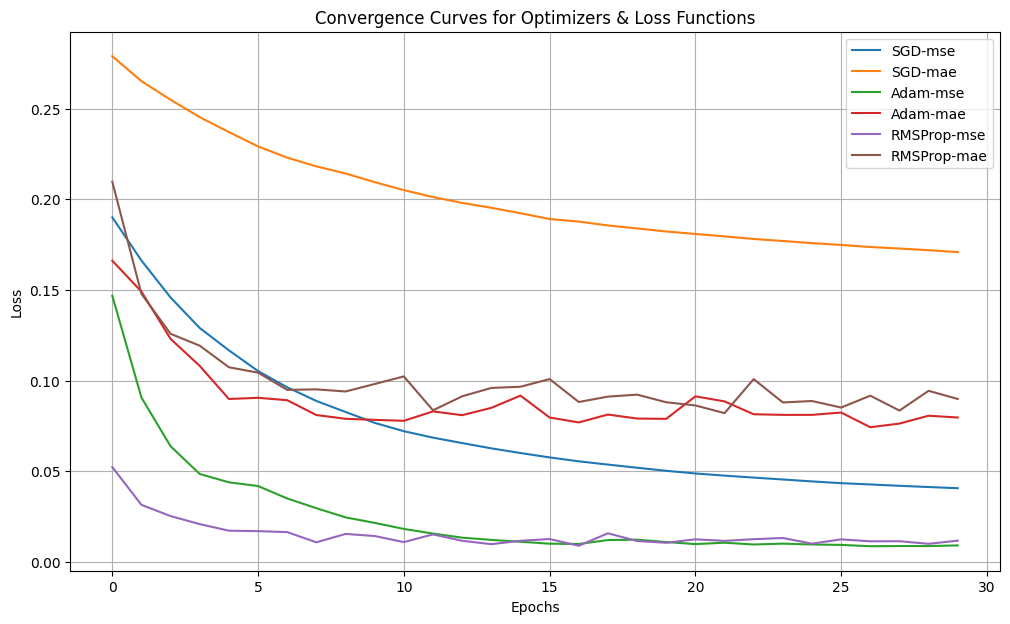

In [3]:
# ---------------------------------------------------------------
# ✅ FIX 0: Enable eager execution
# ---------------------------------------------------------------
import tensorflow as tf
tf.config.run_functions_eagerly(True)

# ---------------------------------------------------------------
# Experiment: Different Optimizers & Loss Functions
# ---------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# ---------------------------------------------------------------
# 1. Generate Dataset
# ---------------------------------------------------------------
np.random.seed(42)
X = np.linspace(-1, 1, 200).reshape(-1, 1)
y = (X**3 + np.random.normal(0, 0.1, (200, 1)))

# ---------------------------------------------------------------
# 2. Function to build model
# ---------------------------------------------------------------
def build_model(loss_fn, optimizer_name):
    # ✅ Create NEW optimizer instance every time
    if optimizer_name == "SGD":
        opt = SGD(learning_rate=0.01)
    elif optimizer_name == "Adam":
        opt = Adam(learning_rate=0.01)
    else:
        opt = RMSprop(learning_rate=0.01)

    model = Sequential([
        Input(shape=(1,)),
        Dense(16, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    model.compile(loss=loss_fn, optimizer=opt, run_eagerly=True)
    return model

# ---------------------------------------------------------------
# 3. Settings
# ---------------------------------------------------------------
optimizers = ["SGD", "Adam", "RMSProp"]
loss_functions = ["mse", "mae"]
history_results = {}

# ---------------------------------------------------------------
# 4. Training Loop
# ---------------------------------------------------------------
for opt_name in optimizers:
    for loss_fn in loss_functions:
        print(f"Training: {opt_name}, Loss={loss_fn}")

        model = build_model(loss_fn, opt_name)
        history = model.fit(X, y, epochs=30, verbose=0)

        key = f"{opt_name}-{loss_fn}"
        history_results[key] = history.history["loss"]

# ---------------------------------------------------------------
# 5. Plot
# ---------------------------------------------------------------
plt.figure(figsize=(12, 7))

for key, losses in history_results.items():
    plt.plot(losses, label=key)

plt.title("Convergence Curves for Optimizers & Loss Functions")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
